In [3]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/72/b8/2ef7057c956f1062ffab750a90a6bdcd3de127fb696fb64583c2dfe77aab/tensorflow-2.2.0-cp36-cp36m-win_amd64.whl


You are using pip version 9.0.1, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


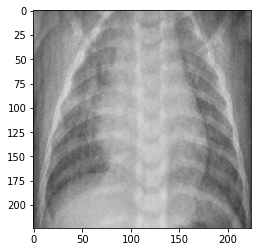

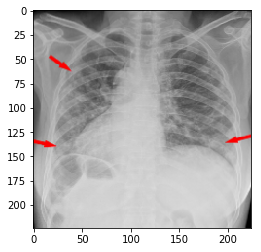

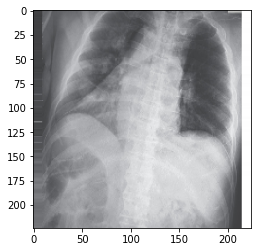

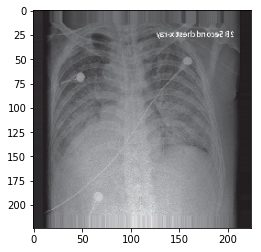

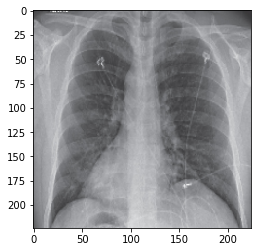

In [3]:
#viewing images
import matplotlib.pyplot as plt
%matplotlib inline
import random
for i in range(5):
    a=random.randint(0,31)
    plt.figure()
    plt.imshow(train_generator[0][0][a])


In [4]:
#building model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

model = Sequential([
layers.Conv2D(64, (3, 3), input_shape=(224,224,3), padding='same', activation='relu'),
layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
layers.Conv2D(128, (3, 3), activation='relu', padding='same',),
layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
layers.Flatten(),
layers.Dense(4096, activation='relu'),
layers.Dense(4096, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(optimizer=Adam(lr=0.0001),loss="binary_crossentropy",metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
model.fit_generator(generator=train_generator,epochs=5,validation_data=validation_generator,steps_per_epoch=2 , validation_steps=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5


In [8]:
model.save('94_percentacuracy_')

In [21]:
validation_generator = test_datagen.flow_from_directory(
        './dataset/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 10 images belonging to 2 classes.
{0: 'covid', 1: 'normal'}


In [22]:
import cv2
for i in range(10):
    image=validation_generator[0][0][i]
    predicted=model.predict_classes(image.reshape(1,224,224,3))
    original=int(validation_generator[0][1][i])
    if(predicted==[[0]]):
        predicted='positive'
    else:
        predicted="negative"
    
    if(original==0):
        original='positive'
    else:
        original="negative"
    
    cv2.putText(image, "predicted: "+str(predccccccccccccccccccccccccccccccccccccccccccccccccccccccc  m  fodicted), (0,50) , cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,255,0), 2)
    cv2.putText(image, "original: "+str(original), (0,100) , cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,255,0), 2)
    cv2.imshow('testing',image)
    cv2.waitKey(0)
cv2.destroyAllWindows()

original :  0.0 predicted :  positive
original :  0.0 predicted :  positive
original :  0.0 predicted :  positive
original :  0.0 predicted :  positive
original :  0.0 predicted :  positive
original :  1.0 predicted :  negative
original :  1.0 predicted :  negative
original :  1.0 predicted :  negative
original :  1.0 predicted :  negative
original :  1.0 predicted :  negative
